In [18]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
# Load the datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Preview datasets
print(customers.head())
print(products.head())
print(transactions.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [20]:
#Data Overview
#Understand the structure of the data:
print(customers.info())
print(products.info())
print(transactions.info())

#Check for missing values:
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

#Check for duplicates:
print(customers.duplicated().sum())
print(products.duplicated().sum())
print(transactions.duplicated().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

In [21]:
#Data Cleaning
#Handle missing values:
customers['Region'].fillna(customers['Region'].mode()[0], inplace=True)

#Remove duplicates if found:
customers.drop_duplicates(inplace=True)

#Check for inconsistencies
# Ensure all ProductIDs in Transactions exist in Products
print(set(transactions['ProductID']).difference(set(products['ProductID'])))

set()


In [22]:
# Merge transactions with customers
transactions_customers = pd.merge(transactions, customers, on='CustomerID', how='left')

# Merge with products
full_data = pd.merge(transactions_customers, products, on='ProductID', how='left')

# Preview the merged dataset
print(full_data.head())



  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker

In [23]:
#Exploratory Data Analysis

#Descriptive Statistics
print(full_data.describe())

          Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   689.995560   272.55407   272.55407
std       1.117981   493.144478   140.73639   140.73639
min       1.000000    16.080000    16.08000    16.08000
25%       2.000000   295.295000   147.95000   147.95000
50%       3.000000   588.880000   299.93000   299.93000
75%       4.000000  1011.660000   404.40000   404.40000
max       4.000000  1991.040000   497.76000   497.76000


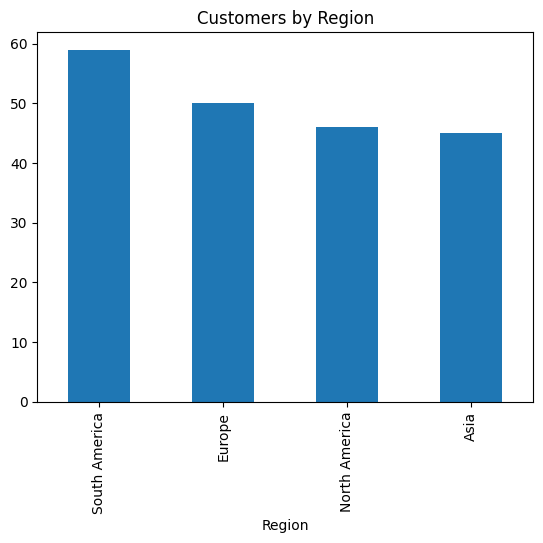

In [24]:
#Analyze Customer Information
region_counts = customers['Region'].value_counts()
region_counts.plot(kind='bar', title='Customers by Region')
plt.show()


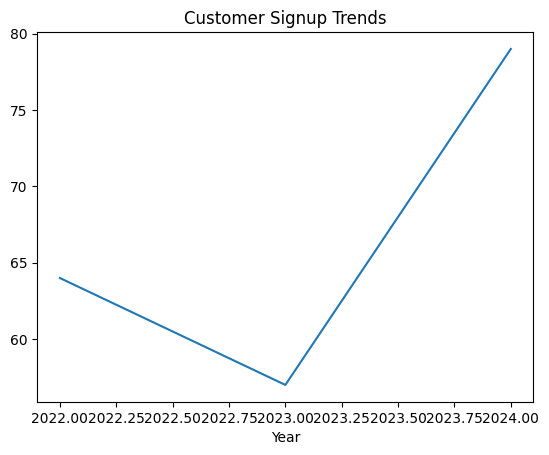

In [25]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['Year'] = customers['SignupDate'].dt.year
customers['Year'].value_counts().sort_index().plot(kind='line', title='Customer Signup Trends')
plt.show()


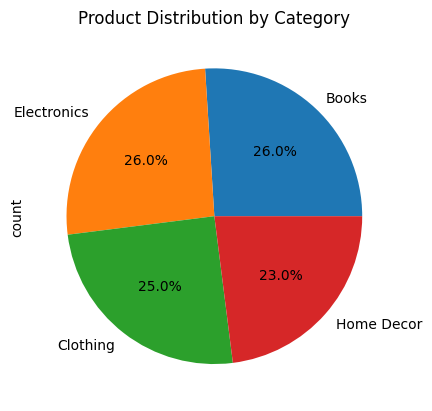

In [26]:
#Analyze Product Information
products['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Product Distribution by Category')
plt.show()


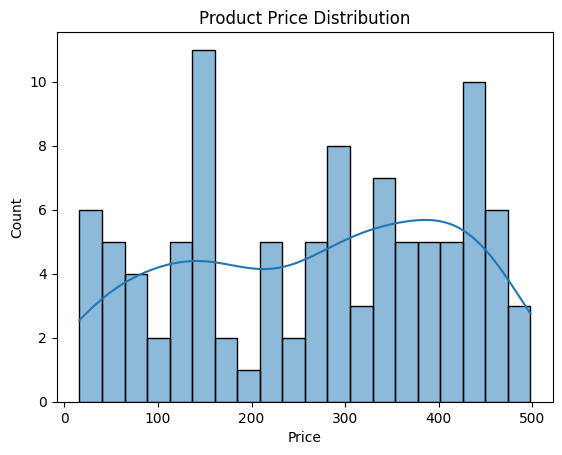

In [27]:
sns.histplot(products['Price'], bins=20, kde=True)
plt.title('Product Price Distribution')
plt.show()


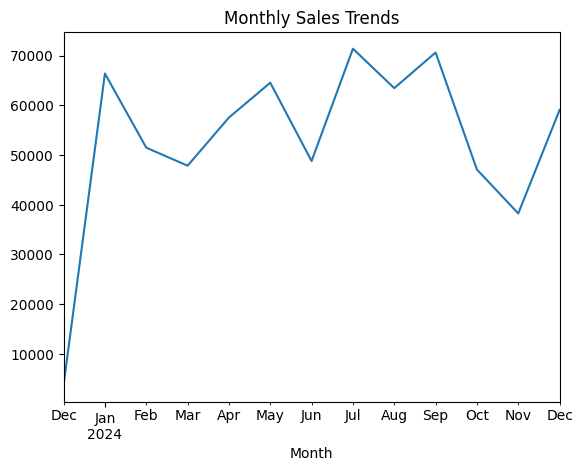

In [28]:
#Analyze Transaction Information
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('Month')['TotalValue'].sum()
monthly_sales.plot(kind='line', title='Monthly Sales Trends')
plt.show()


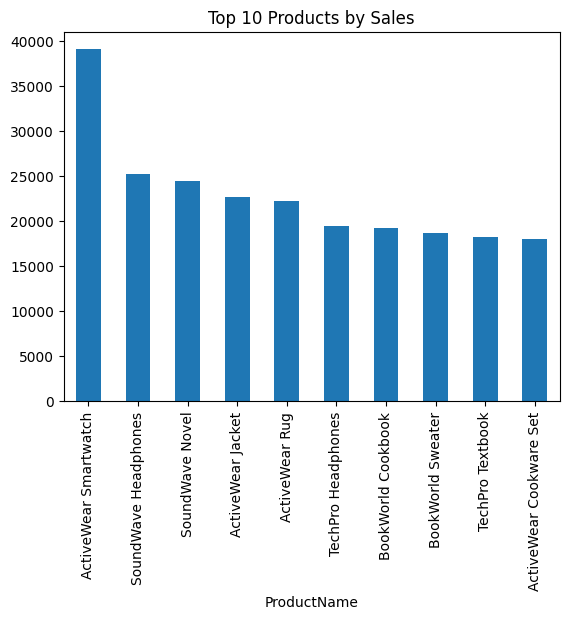

In [29]:
top_products = full_data.groupby('ProductName')['TotalValue'].sum().nlargest(10)
top_products.plot(kind='bar', title='Top 10 Products by Sales')
plt.show()


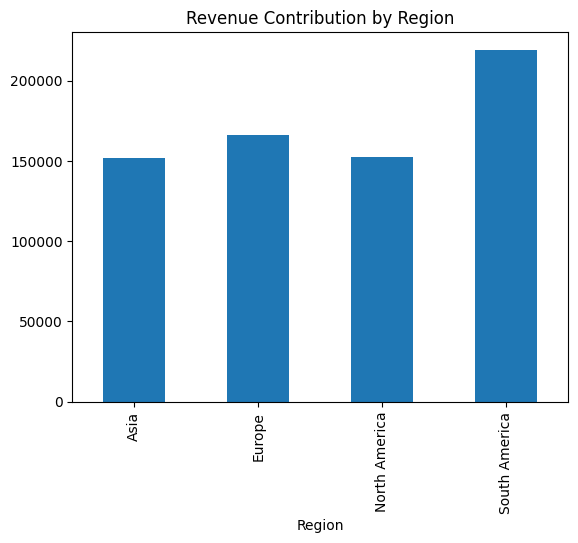

In [30]:
region_sales = full_data.groupby('Region')['TotalValue'].sum()
region_sales.plot(kind='bar', title='Revenue Contribution by Region')
plt.show()
